## Wine Quality K-Means Clustering

### Dataset

Dataset containing information about the red variants of the Portuguese "Vinho Verde" wine. Dataset contains 1,599 rows of data. Dataset obtained from Kaggle at https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009. 

Dataset contains the columns:

- fixed acidity: Referring to acids that do not evaporate easily
- volatile acidity: Referring to acids that can evaporate at room temperature
- citric acid: The level of citric acid in the wine
- residual sugar: The level of residual sugar in the wine
- chlorides: The level of chlorides in the wine
- free sulfur dioxide: Portion of sulfur dioxide not bount to other molecules
- total sulfur dioxide: Sum of free and bound sulfur dioxide in the wine
- density: The density of the wine
- pH: The pH of the wine
- suphates: The level of sulphates in the wine
- alcohol: The alcohol percentage of the wine
- quality: Quality score between 0 and 10


##### Preprocessing

No preprocessing was performed on the dataset.

### Findings

From performing operations on this dataset, I have found that the K-Means Clustering model was not very accurate. As seen in the graph the clusters are somewhat distinct, but the silhouette score shows that there is some degree overlap.

## Changelog

#### Version 1

- Read in dataset.
- Normalised values.
- Used elbow method to determine optimal number of clusters.
- Initialised model using optimal number of clusters.
- Fit the model to the data
- Performed Principal Component Analysis to reduce to 2 dimensions.
- Plotted clusters.
- Analysed accuracy of model.

In [ ]:
# Import pandas to read file

import pandas as pd

In [ ]:
# Read dfset, print rows to check if it has worked

df = pd.read_csv("winequality-red.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
# Check for any rows with null values

print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Normalise the df

from sklearn.preprocessing import StandardScaler

X = df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

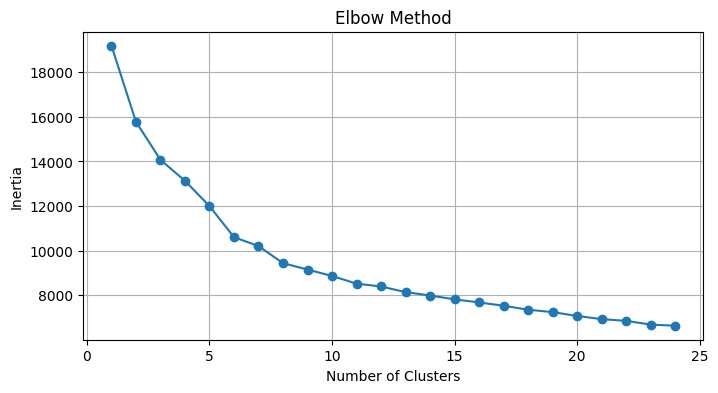

In [14]:
# Find the optimal number of clusters using the Elbow method
# Where the graph flattens is the optimal number of clusters

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 25)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [ ]:
# Initialise data using optimal number of clusters
# Fit model to the data

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
df['cluster'] = kmeans.labels_

In [56]:
# Perform Principal Component Analysis to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

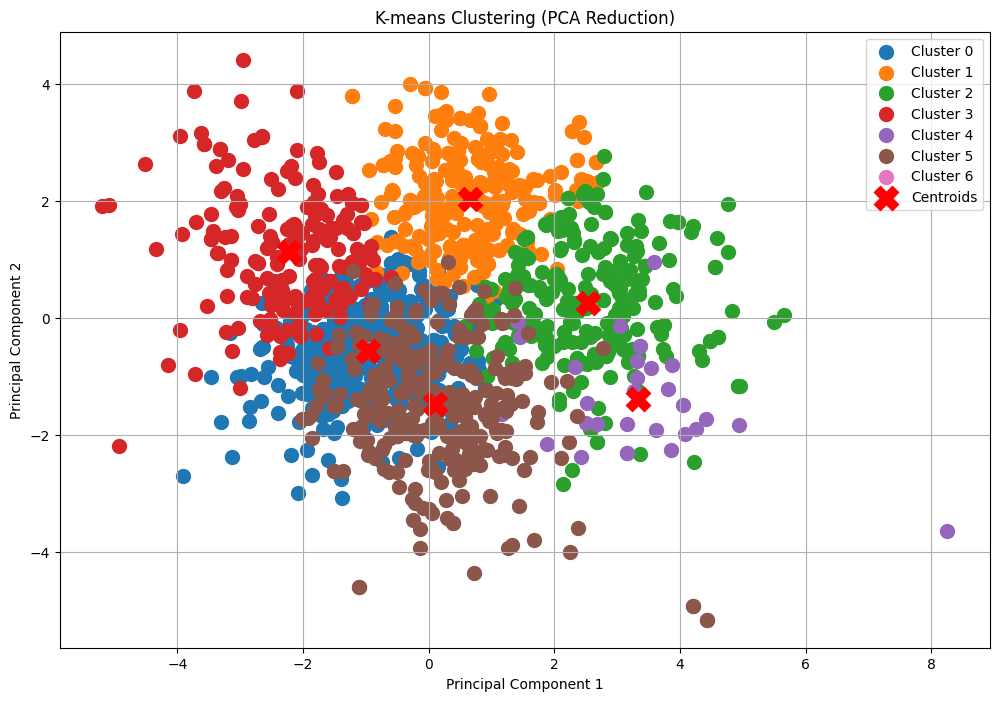

In [58]:
# Plot the clusters and their centres

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[df['cluster'] == 0, 0], X_pca[df['cluster'] == 0, 1], s=100, label='Cluster 0')
plt.scatter(X_pca[df['cluster'] == 1, 0], X_pca[df['cluster'] == 1, 1], s=100, label='Cluster 1')
plt.scatter(X_pca[df['cluster'] == 2, 0], X_pca[df['cluster'] == 2, 1], s=100, label='Cluster 2')
plt.scatter(X_pca[df['cluster'] == 3, 0], X_pca[df['cluster'] == 3, 1], s=100, label='Cluster 3')
plt.scatter(X_pca[df['cluster'] == 4, 0], X_pca[df['cluster'] == 4, 1], s=100, label='Cluster 4')
plt.scatter(X_pca[df['cluster'] == 5, 0], X_pca[df['cluster'] == 5, 1], s=100, label='Cluster 5')
plt.scatter(X_pca[df['cluster'] == 6, 0], X_pca[df['cluster'] == 6, 1], s=100, label='Cluster 6')

plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('K-means Clustering (PCA Reduction)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Print cluster counts

cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

cluster
0    506
5    336
2    264
1    251
3    212
4     30
Name: count, dtype: int64


In [ ]:
# Print means for each column in each cluster

cluster_means = df.groupby('cluster').mean()
print(cluster_means)

         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             7.616996          0.640652     0.129289        2.216502   
1             8.614343          0.343327     0.410438        2.334661   
2            11.139773          0.424489     0.509242        2.940152   
3             6.468868          0.597311     0.090519        2.199057   
4             8.433333          0.529667     0.486000        1.963333   
5             8.099405          0.532902     0.287619        3.127083   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.085389            10.949605             34.557312  0.996776   
1         0.073737            12.665339             28.657371  0.995600   
2         0.090201            11.022727             32.840909  0.998954   
3         0.068590            18.476415 

In [ ]:
# Check model accuracy usinf silhouette score, a range from -1 to +1
# The higher the silhouette score the more accurate the model

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.16899773653867275


#### Results

The silhouette score tells us that the clusters are somewhat distinct, but that there may be some overlap and that the clusters are not totally distinct. This means that the model is not very accurate.